### <p style="text-align: right;"> &#9989; **Group 1 (GoGreen)** </p>
#### <p style="text-align: right;"> &#9989; Beth, Zhongjie, McKenna, Erik</p>

# Module 1



## How do SNPs relate to gene transcription?

We will work with maize. Last updated 2020/01/23

Jupyter by default converts `tabs` into `spaces` which is good.

First, import the usual libraries
- `math`: basic math operations
- `os`: enable file manipulation with the OS
- `sys`: enable interaction with commandline
- `glob`: more variable manipulation
- `matplotlib.pyplot`: default plotter (I personally like ggplot waaaaay better. E)
    - `inline`: so that plots are shown in the notebook
- `seaborn`: nicer plots
- `numpy`: all number cruching done here
- `pandas`: data wrangling

In [3]:
import math  
import os   
import glob 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats


Define some functions. Let's see for how long can we keep tidy commented code.

In [4]:
# Path to the folder where all the raw data is located (Path to folder on desktop)
src = '/mnt/research/compbiol_shiu/frontier20/_dataset/'

# Path where we will save outputs
dst = '/mnt/scratch/getti014/CSS_module1/'

# Matrix with raw SNP data
file_snp_raw = 'B73_plus_RTAs_snp_matrix_995785.txt'

# Matrix with imputed SNP data
file_snp_imp = 'B73_plus_RTAs_snp_matrix_imputed/widiv_942g_979873SNPs_imputed_filteredGenos_withRTA_AGPv4.hmp.txt'

# Matrix with gene expression (FPKM)
file_gen = '942_FPKM_B73_genes_w_feature.txt'

In [5]:

clean = True

if clean:
    snp_matrix_imputed = pd.read_csv(src + file_snp_imp, dtype={'chromosome': int}, nrows=1000)
else:
    snp_matrix_raw = pd.read_table(src + file_snp_raw, dtype={'chromosome': int}, nrows=1000)

In [6]:
snp_matrix_imputed

,chrom,pos,764,779,787,790,793,904,911,912,...,YANG,YE_4,YE-CHI-HUNG,YELLOW_3-4,YING-55,Yong_28,Yu796_NS,ZS01250,ZS1791,ZS635
0,10,95800527,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
1,10,95800923,G,A,A,A,G,A,A,A,...,G,A,A,A,A,A,A,G,G,G
2,10,95800952,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,10,95800959,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
4,10,95801220,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10,99543491,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
996,10,99543614,T,T,C,T,T,C,C,C,...,C,C,C,C,C,T,C,T,T,T
997,10,99543637,G,G,G,G,G,G,G,G,...,G,G,G,G,G,G,G,G,G,G
998,10,99543702,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T


Now let's explore the expression data!!

We have 44259 rows × 947 columns in total.
- Rows: FPKM for the same gene across all 942 cultivars
- Columns: 5 columns of metadata + 942 cultivars

In [7]:
#
fpkm = pd.read_csv(src+file_gen)
fpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,Zm00001d024742,10,gene,85863323,85863746,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Zm00001d025653,10,gene,125107973,125113328,9.350780,9.954800,7.735490,10.360900,9.072890,...,4.685600,3.870230,5.278490,5.178290,3.802910,6.446750,5.618580,3.980550,4.175450,4.500850
2,Zm00001d024903,10,gene,93908316,93911235,0.954312,0.335773,0.689938,0.106595,0.200660,...,1.809510,1.671710,2.940510,1.523060,7.885560,4.522500,1.478990,9.566990,6.826610,0.509826
3,Zm00001d023618,10,gene,12298031,12300071,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Zm00001d024825,10,gene,89733155,89739279,0.857062,0.689824,0.613990,1.146330,1.137050,...,0.617702,0.317978,0.354413,0.412837,0.495563,0.312885,0.616760,0.450897,0.610228,0.472077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Zm00001d023459,10,gene,6289475,6298739,7.743020,12.641800,10.975500,12.337900,15.497200,...,7.251110,13.711400,15.806400,16.518300,6.885620,22.863300,8.189910,6.772000,7.192290,10.332200
2983,Zm00001d026184,10,gene,140529821,140530718,0.437610,0.361114,0.366553,0.512719,0.149871,...,0.742883,0.587186,2.192500,0.110062,1.083900,1.572130,0.272518,0.154927,0.975337,0.605777
2984,Zm00001d024000,10,gene,35675291,35679293,38.797700,28.401200,3.048510,4.423800,8.698070,...,0.093581,2.816500,5.026650,3.186000,0.373411,18.871700,0.000000,0.000000,9.644770,33.329400
2985,Zm00001d025251,10,gene,111149588,111152196,0.081500,0.000000,0.068706,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.046316,0.062825,0.000000,0.000000,0.252784,0.000000,0.033119


FPKM can be easily converted to TPM by dividing each FPKM value by the sum of all FPKM values of the respective sample, and multiplying this by 1e6. This yields TPM

In [8]:
#.iloc[ ":" means to take all the rows, from colomn 5 onward] 
#sum the values in each column 'index' means row
total_exp = fpkm.iloc[:, 5:].sum(axis='index')
#take every row and column 5 onward and multiply by million
tpm = fpkm.iloc[:, 5:]*1e6
tpm = tpm.div(other=total_exp, axis='columns')
tpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,189.506595,261.983538,167.684262,253.040916,224.313529,275.336702,166.955091,187.486662,296.027161,198.988429,...,106.068226,79.385036,105.279689,113.680289,80.412785,143.121705,115.768295,84.420322,77.637823,90.144794
2,19.340463,8.836641,14.955968,2.603335,4.961016,27.759864,2.206053,2.291979,10.087266,14.960538,...,40.961993,34.289631,58.648587,33.436115,166.740691,100.402204,30.473919,202.898688,126.933177,10.210996
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17.369556,18.154311,13.309624,27.996448,28.111847,16.584633,19.635756,17.736032,19.828836,19.988898,...,13.982960,6.522273,7.068781,9.063113,10.478713,6.946234,12.708060,9.562716,11.346507,9.454944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,156.923097,332.698145,237.918815,301.324549,383.144911,133.736242,171.979304,105.649796,343.939341,190.672884,...,164.143839,281.244261,315.259265,362.630351,145.596893,507.578931,168.749385,143.621966,133.732588,206.937364
2983,8.868777,9.503548,7.945866,12.521971,3.705335,20.414475,5.310212,13.227242,10.077015,0.000000,...,16.816690,12.044189,43.729498,2.416218,22.919138,34.902226,5.615110,3.285724,18.135301,12.132740
2984,786.289487,747.443129,66.083357,108.041039,215.046670,148.416419,159.188164,185.696017,1118.820979,881.939039,...,2.118395,57.771231,100.256731,69.943051,7.895800,418.963024,0.000000,0.000000,179.333710,667.534329
2985,1.651715,0.000000,1.489356,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.016784,1.328441,0.000000,0.000000,5.361095,0.000000,0.663318


In [9]:
#the function sample, computes the zscore for only 1 cultivar 
def z_score_sample(sample, cutoff=2**-15, kernel='scott', num=1024):
    sample = sample[sample > cutoff]
    sample = np.log2(sample)
    kde = stats.gaussian_kde(sample)
    x = np.linspace(start=sample.min(), stop=sample.max(), num=num)
    y = kde(x)
    mu = x[np.argmax(y)]
    
    U = np.mean(sample[sample > mu])
    
    sigma = (U - mu) * math.sqrt(0.5*math.pi)
    
    zFPKM = (sample - mu) / sigma
    
    return zFPKM, mu, U, sigma

In [10]:
def z_score(df, skip, cutoff=-15, kernel='scott', num=1024):
    zcopy = df.copy()
    for col in zcopy.columns[skip:]:
        z,mu,U,sigma = z_score_sample(df[col], cutoff=2**cutoff, kernel=kernel, num=num)
        zcopy[col] = cutoff
        zcopy.loc[z.index, col] = z
    return zcopy

In [11]:
z,mu,U,sigma = z_score_sample(fpkm['LH162'])


In [12]:
zfpkm = z_score(fpkm, skip=5)

In [13]:
zfpkm

,gene,chromosome,feature_type,position_left,position_right,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,Zm00001d024742,10,gene,85863323,85863746,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
1,Zm00001d025653,10,gene,125107973,125113328,-0.024399,0.145253,-0.082046,0.137629,-0.011292,...,-0.133157,-0.478906,-0.092693,-0.235519,-0.363044,-0.151787,-0.140024,-0.374654,-0.456824,-0.289027
2,Zm00001d024903,10,gene,93908316,93911235,-1.661502,-2.240443,-1.750591,-3.094485,-2.803231,...,-0.730240,-1.053271,-0.461148,-1.081560,0.112201,-0.394511,-1.016071,0.207278,-0.129299,-1.738770
3,Zm00001d023618,10,gene,12298031,12300071,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
4,Zm00001d024825,10,gene,89733155,89739279,-1.738600,-1.733653,-1.831102,-1.417055,-1.532622,...,-1.404744,-2.188785,-1.793673,-1.984063,-1.691045,-2.223260,-1.590141,-1.819986,-1.738088,-1.789976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,Zm00001d023459,10,gene,6289475,6298739,-0.159736,0.313447,0.159469,0.260958,0.380875,...,0.140873,0.386549,0.598028,0.566441,0.023835,0.714979,0.107306,-0.022019,-0.094534,0.264123
2983,Zm00001d026184,10,gene,140529821,140530718,-2.220775,-2.189231,-2.187206,-1.985260,-3.017007,...,-1.288939,-1.769123,-0.646012,-2.898033,-1.181027,-1.117959,-2.126234,-2.528926,-1.425658,-1.623984
2984,Zm00001d024000,10,gene,35675291,35679293,0.996287,0.883179,-0.724872,-0.463377,-0.042197,...,-2.589062,-0.696358,-0.123481,-0.571313,-1.875478,0.583612,-15.000000,-15.000000,0.100943,1.043710
2985,Zm00001d025251,10,gene,111149588,111152196,-3.426404,-15.000000,-3.343056,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-3.496435,-3.036975,-15.000000,-15.000000,-2.204028,-15.000000,-3.558620


In [14]:
cutoff = 2**-15
sample = tpm['NC328']
sample = sample[sample > cutoff]
sample = np.log2(sample)
kde = stats.gaussian_kde(sample)
x = np.linspace(start=sample.min(), stop=sample.max(), num=1024)
y = kde(x)
mu = x[np.argmax(y)]
print(mu)

7.0403441764609145


8.873751301743216


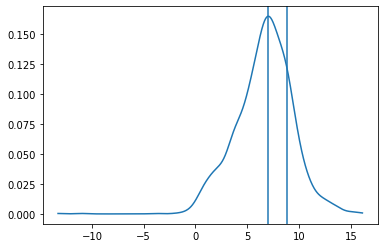

In [15]:
U = np.mean(sample[sample > mu])
print(U)
plt.axvline(mu)
plt.axvline(U)
plt.plot(x, kde(x))

In [16]:
ztpm = z_score(tpm, skip=0)

In [17]:
ztpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
0,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
1,-0.019698,0.145338,-0.079922,0.145175,-0.002612,0.205236,-0.092319,0.006023,0.195782,-0.038335,...,-0.135560,-0.478592,-0.086041,-0.231162,-0.368779,-0.146139,-0.145117,-0.376134,-0.461432,-0.295281
2,-1.652013,-2.240051,-1.753161,-3.090374,-2.793503,-1.391991,-3.130046,-3.035679,-2.209044,-1.887243,...,-0.732920,-1.052815,-0.453762,-1.076138,0.107531,-0.388773,-1.024032,0.206532,-0.132983,-1.746453
3,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000
4,-1.728886,-1.733326,-1.833898,-1.411162,-1.523371,-1.750583,-1.595113,-1.622540,-1.728059,-1.680219,...,-1.407737,-2.188050,-1.783632,-1.977506,-1.699757,-2.216849,-1.599980,-1.823290,-1.746314,-1.797709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,-0.154639,0.313510,0.162273,0.268635,0.389408,-0.297465,-0.071502,-0.390103,0.302541,-0.068834,...,0.138597,0.386650,0.603304,0.569789,0.018967,0.720308,0.103022,-0.023054,-0.098119,0.258415
2983,-2.209650,-2.188845,-2.191004,-1.979970,-3.007199,-1.605948,-2.513287,-1.825113,-2.209768,-15.000000,...,-1.291878,-1.768492,-0.638258,-2.890325,-1.188596,-1.111955,-2.137827,-2.533125,-1.433001,-1.631554
2984,0.998003,0.883168,-0.724556,-0.456470,-0.033505,-0.224960,-0.125767,-0.000605,1.141991,1.025411,...,-2.592602,-0.695991,-0.116767,-0.566534,-1.884604,0.588989,-15.000000,-15.000000,0.097910,1.038770
2985,-3.411753,-15.000000,-3.350106,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-3.487975,-3.048705,-15.000000,-15.000000,-2.207817,-15.000000,-3.568097


In [18]:
var_ztpm = ztpm.var(axis=1)

In [24]:
ztpm['var'] = ztpm.var(axis='columns')
ztpm

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
0,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,1.290639
1,-0.019698,0.145338,-0.079922,0.145175,-0.002612,0.205236,-0.092319,0.006023,0.195782,-0.038335,...,-0.478592,-0.086041,-0.231162,-0.368779,-0.146139,-0.145117,-0.376134,-0.461432,-0.295281,0.029076
2,-1.652013,-2.240051,-1.753161,-3.090374,-2.793503,-1.391991,-3.130046,-3.035679,-2.209044,-1.887243,...,-1.052815,-0.453762,-1.076138,0.107531,-0.388773,-1.024032,0.206532,-0.132983,-1.746453,4.989611
3,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,0.000000
4,-1.728886,-1.733326,-1.833898,-1.411162,-1.523371,-1.750583,-1.595113,-1.622540,-1.728059,-1.680219,...,-2.188050,-1.783632,-1.977506,-1.699757,-2.216849,-1.599980,-1.823290,-1.746314,-1.797709,0.056540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,-0.154639,0.313510,0.162273,0.268635,0.389408,-0.297465,-0.071502,-0.390103,0.302541,-0.068834,...,0.386650,0.603304,0.569789,0.018967,0.720308,0.103022,-0.023054,-0.098119,0.258415,0.059633
2983,-2.209650,-2.188845,-2.191004,-1.979970,-3.007199,-1.605948,-2.513287,-1.825113,-2.209768,-15.000000,...,-1.768492,-0.638258,-2.890325,-1.188596,-1.111955,-2.137827,-2.533125,-1.433001,-1.631554,30.285166
2984,0.998003,0.883168,-0.724556,-0.456470,-0.033505,-0.224960,-0.125767,-0.000605,1.141991,1.025411,...,-0.695991,-0.116767,-0.566534,-1.884604,0.588989,-15.000000,-15.000000,0.097910,1.038770,6.928216
2985,-3.411753,-15.000000,-3.350106,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-3.487975,-3.048705,-15.000000,-15.000000,-2.207817,-15.000000,-3.568097,26.213530


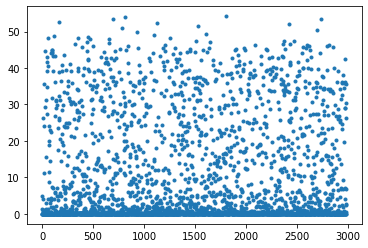

In [25]:
plt.plot(ztpm['var'], '.')

In [26]:
high_z = ztpm[ztpm['var']>45]
high_z

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43,var
63,-1.476757,-15.000000,-2.435411,-15.000000,-2.596680,-15.000000,-2.417903,-15.000000,-2.349458,-15.000000,...,-0.776489,-0.597742,-0.769389,-0.368163,-0.703801,-0.937499,-1.763639,-1.536863,-0.063641,48.340302
120,-4.853273,-0.226260,-0.152607,-15.000000,-0.302224,-2.429506,-0.321663,-0.148212,-2.523566,-15.000000,...,-15.000000,-2.937224,-0.268997,-15.000000,-15.000000,-0.135506,-15.000000,-15.000000,-15.000000,48.784954
167,0.783411,0.307847,0.394613,-1.844411,0.370264,0.871049,-15.000000,0.189810,-15.000000,-2.287435,...,-15.000000,-1.073308,-0.109260,-0.178559,0.041162,-15.000000,-0.366683,-1.896516,0.623614,52.560565
320,-1.967276,-2.427470,-1.946286,-1.682425,-2.075256,-15.000000,-15.000000,-1.518283,-2.325771,-2.572128,...,0.543999,1.010331,0.869661,0.782402,0.550234,0.580215,0.388407,0.464056,0.609212,46.653714
356,-0.643167,-1.045579,-0.683903,-15.000000,-1.027017,-15.000000,-1.137502,-1.148225,-1.033292,-1.054213,...,-1.408648,-15.000000,-15.000000,-15.000000,-0.671992,-15.000000,-15.000000,-1.599486,-0.852832,48.337042
392,-1.531132,-1.427710,-15.000000,-15.000000,-2.981553,-1.665204,-15.000000,-2.190005,-15.000000,-15.000000,...,-15.000000,-15.000000,-0.635134,-0.668630,-15.000000,-0.666989,-15.000000,-15.000000,-15.000000,45.833264
439,-0.987702,-0.818525,-15.000000,-3.084246,-0.794030,-0.873659,-15.000000,-15.000000,-0.965341,-4.247119,...,-2.821396,-0.744246,-1.545220,-15.000000,-0.700605,-15.000000,-0.913354,-15.000000,-15.000000,47.054657
451,-2.617113,-15.000000,-15.000000,-4.130839,-15.000000,-3.690494,0.689092,1.557459,-15.000000,-15.000000,...,0.114450,-15.000000,-0.611289,0.629018,-1.770451,-15.000000,0.112634,0.297256,-15.000000,48.484876
473,-15.000000,-15.000000,0.116635,-15.000000,-0.013813,0.054986,-15.000000,-1.719352,0.400381,0.107314,...,-15.000000,-15.000000,-2.480078,-15.000000,-15.000000,-0.305222,-0.277626,-0.284831,0.148356,48.015739
496,-15.000000,-1.855850,-1.720122,-15.000000,-1.242684,-2.192414,-15.000000,-15.000000,-15.000000,-15.000000,...,-15.000000,-15.000000,-15.000000,-1.434137,-0.317374,-15.000000,-0.743407,-1.641144,-0.668403,46.121563


In [28]:
high_z.index

Int64Index([  63,  120,  167,  320,  356,  392,  439,  451,  473,  496,  659,
             660,  699,  766,  787,  818,  839,  935,  942, 1100, 1123, 1186,
            1202, 1259, 1307, 1451, 1506, 1532, 1613, 1638, 1651, 1801, 1895,
            1900, 1981, 1996, 2091, 2195, 2367, 2369, 2386, 2426, 2431, 2468,
            2564, 2591, 2603, 2619, 2699, 2733, 2793, 2811, 2854],
           dtype='int64')

In [29]:
tpm_high_z = tpm.iloc[[63,  120,  167,  320,  356,  392,  439,  451,  473,  496,  659,
             660,  699,  766,  787,  818,  839,  935,  942, 1100, 1123, 1186,
            1202, 1259, 1307, 1451, 1506, 1532, 1613, 1638, 1651, 1801, 1895,
            1900, 1981, 1996, 2091, 2195, 2367, 2369, 2386, 2426, 2431, 2468,
            2564, 2591, 2603, 2619, 2699, 2733, 2793, 2811, 2854],:]

In [30]:
tpm_high_z

,LH128,DKMBZA,CQ806,DKF274,Ill.Hy,LH162,DKWDAD1,H105W,L222,PHHB4,...,NC328,NC326,PHV53,DKIBC2,A641,WIL900,Va22,E8501,PHP85,Oh43
63,24.710612,0.000000,5.582351e+00,0.000000e+00,6.490930,0.000000,6.082918,0.000000,8.281053e+00,0.000000e+00,...,172.852091,51.357425,46.641274,5.213787e+01,80.488696,63.364281,3.475348e+01,10.460905,1.552427e+01,127.621322
120,0.220105,154.513653,1.509713e+02,0.000000e+00,148.989206,6.253926,120.431171,149.961884,6.483881e+00,0.000000e+00,...,0.000000,0.000000,1.127812,1.076188e+02,0.000000,0.000000,1.174704e+02,0.000000,0.000000e+00,0.000000
167,582.478466,330.032202,3.328002e+02,1.516873e+01,373.257986,716.537097,0.000000,244.649583,0.000000e+00,8.544481e+00,...,12.038209,0.000000,21.885891,1.356309e+02,107.599420,188.172490,0.000000e+00,85.629614,9.062044e+00,357.993509
320,12.446180,6.770706,1.131516e+01,1.907482e+01,13.230159,0.000000,0.000000,20.626131,8.561315e+00,5.736292e+00,...,532.215477,353.984939,602.441899,5.598561e+02,468.585246,395.898823,3.483054e+02,266.780136,3.102185e+02,350.338657
356,79.258828,48.236731,7.008021e+01,0.000000e+00,55.370487,0.000000,37.679283,35.247396,5.263599e+01,4.800807e+01,...,6.353975,20.381850,0.000000,0.000000e+00,0.000000,66.378678,0.000000e+00,0.000000,1.413527e+01,39.041747
392,22.901634,28.026617,0.000000e+00,0.000000e+00,3.837407,18.748686,0.000000,7.798459,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,6.332810e+01,50.809269,0.000000,5.240890e+01,0.000000,0.000000e+00,0.000000
439,48.960163,66.602264,0.000000e+00,2.626000e+00,76.113745,58.449959,0.000000,0.000000,5.790953e+01,5.501340e-01,...,0.000000,2.583963,36.943598,1.695019e+01,0.000000,63.660881,0.000000e+00,37.611268,0.000000e+00,0.000000
451,5.017047,0.000000,0.000000e+00,5.975203e-01,0.000000,1.022051,508.090332,1772.490966,0.000000e+00,0.000000e+00,...,0.000000,188.913465,0.000000,6.555328e+01,370.508084,13.335477,0.000000e+00,176.159807,2.416814e+02,0.000000
473,0.000000,0.000000,2.227404e+02,0.000000e+00,220.908363,221.885616,0.000000,15.416169,3.946293e+02,2.439844e+02,...,0.000000,0.000000,0.000000,4.376951e+00,0.000000,0.000000,9.078157e+01,97.911073,1.011275e+02,175.429497
496,0.000000,15.253591,1.568703e+01,0.000000e+00,41.244472,8.791541,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,15.737237,111.442118,0.000000e+00,48.573153,1.328085e+01,51.491998


In [31]:
tpm_high_z.to_csv(dst+'tpm_high_z.csv', index=False)

In [20]:
var_ztpm

0        1.290639
1        0.029076
2        4.989611
3        0.000000
4        0.056540
          ...    
2982     0.059633
2983    30.285166
2984     6.928216
2985    26.213530
2986     0.091673
Length: 2987, dtype: float64

In [18]:
zfpkm.to_csv(dst+'zfpkm_chr10.csv', index=False)
ztpm.to_csv(dst+'ztpm_chr10.csv', index=False)
var_ztpm.to_csv(dst+ 'var_ztpm.csv', index=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
